<a href="https://colab.research.google.com/github/SHIVALIKA672/Skin-Cancer/blob/main/skin_cancer_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
import os
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
import cv2
import imghdr
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf


In [ ]:
!nvidia-smi

Thu Jul 13 11:41:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
loc = r'/content/drive/My Drive/datasets/skin_cancer_final/'
os.chdir(loc)

Mounted at /content/drive


In [ ]:
import pandas as pd

data = {
    'Model': ['VGG16', 'VGG19', 'DenseNet201', 'ResNet101', 'EfficientNetV2L', 'NASNetLarge', 'ConvNeXtXLarge', 'vgg&dense', 'efficent&resnet'],
    'Recall': [0.875386, 0.862184, 0.866968, 0.881338, 0.867824, 0.787702, 0.926402, 0.902362, 0.898490],
    'Accuracy': [0.874052, 0.861912, 0.874052, 0.881639, 0.869499, 0.786039, 0.927162, 0.901366, 0.899848],
    'Precision': [0.872440, 0.860120, 0.880598, 0.880043, 0.868297, 0.784918, 0.926402, 0.899750, 0.899003],
    'AUC': [0.919287, 0.914180, 0.934993, 0.932442, 0.942810, 0.891524, 0.966416, 0.943599, 0.935192],
    'F1': [0.873322, 0.860908, 0.870835, 0.880616, 0.868053, 0.785167, 0.926402, 0.900699, 0.898738],
    'Norm Time': [0.078641, 0.005248, 0.000000, 0.017407, 0.177381, 0.155663, 1.000000, 0.094709, 0.287595],
    'VScore': [2.645547, 2.615372, 2.656467, 2.672951, 2.642795, 2.414984, 2.763670, 2.724877, 2.707259]
}

df = pd.DataFrame(data)


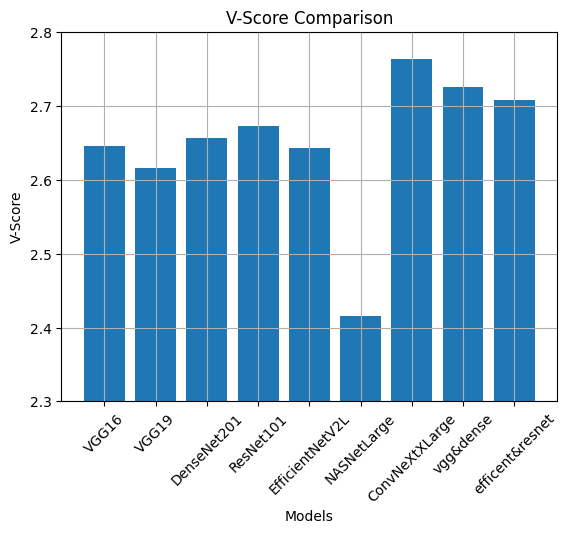

In [ ]:
import matplotlib.pyplot as plt

models = ['VGG16', 'VGG19', 'DenseNet201', 'ResNet101', 'EfficientNetV2L', 'NASNetLarge', 'ConvNeXtXLarge', 'vgg&dense', 'efficent&resnet']
vscore = [2.645547, 2.615372, 2.656467, 2.672951, 2.642795, 2.414984, 2.763670, 2.724877, 2.707259]

plt.bar(models, vscore)
plt.xlabel('Models')
plt.ylabel('V-Score')
plt.title('V-Score Comparison')
plt.ylim(2.3, 2.8)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Your dataframe creation code here...

# Creating subplots
fig = go.Figure()

# Adding bar for each performance metric
for metric in ['Recall', 'Accuracy', 'Precision', 'AUC', 'F1']:
    fig.add_trace(go.Bar(x=df['Model'], y=df[metric], name=metric))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    yaxis=dict(
        title="Value",
        titlefont=dict(
            size=16,
            color='black',

        ),
        tickfont=dict(
            size=14,
            color='black',

        )
    ),
    xaxis=dict(
        title="Models",
        titlefont=dict(
            size=16,
            color='black',

        ),
        tickfont=dict(
            size=14,

        )
    ),
    title=dict(
        text='Performance Metrics Per Model',
        x=0.5,
        font=dict(
            size=20,
            color='black',

        )
    ),
    legend=dict(
        font=dict(
            size=12,
            color='black',

        )
    )
)
fig.update_layout(
    width=800,  # Specify the desired width in pixels
    height=600  # Specify the desired height in pixels
)
fig.show()


In [ ]:
# !pip uninstall tensorflow
# !pip install tensorflow
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os


import tensorflow as tf
import time
from sklearn.metrics import accuracy_score
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy, AUC, TrueNegatives, TruePositives, FalseNegatives, FalsePositives
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from google.colab import drive
import pandas as pd

import tensorflow_addons as tfa

from tensorflow.keras import layers, Model
from tensorflow.keras.utils import plot_model
import networkx as nx
import matplotlib.pyplot as plt
drive.mount('/content/drive')
loc = r'/content/drive/My Drive/datasets/skin_cancer_final/'
os.chdir(loc)

# Constants
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE
SEED = 777
VALIDATION_SPLIT = 0.2

class DebugLayer(layers.Layer):
    def call(self, inputs):
        print("Shape:", tf.shape(inputs))
        return inputs



class FourierLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(FourierLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        pass

    def call(self, inputs):
        # Perform FFT and shift the zero frequency component to the center
        inputs_fft = tf.signal.fftshift(tf.signal.fft2d(tf.cast(inputs, tf.complex64)))

        # Take the absolute value to get the magnitude spectrum
        inputs_fft_mag = tf.math.abs(inputs_fft)

        # Optionally, take the log to visualize better
        inputs_fft_mag = tf.math.log(inputs_fft_mag + 1e-8)

        # Flatten the output
        output = layers.Flatten()(inputs_fft_mag)

        return output

import pywt

class WaveletTransformLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(WaveletTransformLayer, self).__init__(**kwargs)

    def call(self, inputs):
        def wavelet_transform(input_image):
            import pywt
            input_image = input_image.numpy()
            coeffs = pywt.dwt2(input_image, 'haar')
            cA, (cH, cV, cD) = coeffs
            return cA

        output = tf.py_function(func=wavelet_transform,
                                inp=[inputs],
                                Tout=tf.float32)
        output.set_shape([None, 112, 112, 3])  # Assuming that the output shape is half of the input for a single-level wavelet decomposition
        return output

class GaborLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(GaborLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel",
                                      (7, 7, input_shape[-1], 1),
                                      initializer='random_normal')

    def call(self, inputs):
        return tf.nn.conv2d(inputs, self.kernel, strides=[1, 1, 1, 1], padding='SAME')

class RGBtoHSVLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(RGBtoHSVLayer, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.image.rgb_to_hsv(inputs)


class HistEqualizationLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(HistEqualizationLayer, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.image.adjust_contrast(inputs, 2)

class LaplacianLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(LaplacianLayer, self).__init__(**kwargs)

    def call(self, inputs):
        laplacian_filter = tf.constant([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=tf.float32)
        laplacian_filter = tf.reshape(laplacian_filter, [3, 3, 1, 1])
        laplacian_filter = tf.repeat(laplacian_filter, 3, axis=-2)
        return tf.nn.conv2d(inputs, laplacian_filter, strides=[1, 1, 1, 1], padding='SAME')

class Solver:
    def __init__(self, image_size):
        self.eval = {'acc': {}, 'valacc': {}, 'loss': {}, 'valloss': {}, 'details': {'cm':[],'support': [], 'fscore': [], 'Recall': [], 'accuracy': [], 'Precision': [], 'auc': [], 'model': [], 'F1': []}}
        self.IMAGE_SIZE = image_size
        self.md = {}
        self.models = {
            'VGG16': tf.keras.applications.VGG16,
            'VGG19': tf.keras.applications.VGG19,
            # 'Xception': tf.keras.applications.Xception,
            'DenseNet201': tf.keras.applications.DenseNet201,
            'ResNet101': tf.keras.applications.ResNet101,
            'EfficientNetV2L': tf.keras.applications.EfficientNetV2L,
            # 'InceptionResNetV2' : tf.keras.applications.InceptionResNetV2,
            'NASNetLarge' : tf.keras.applications.NASNetLarge,
            'ConvNeXtXLarge': tf.keras.applications.ConvNeXtXLarge
        }

    def load_data(self, data_dir,BATCH_SIZE=BATCH_SIZE,val_split=VALIDATION_SPLIT):
        self.train_ds, self.val_ds, self.num_classes = self._create_datasets(data_dir,val=val_split)

    def _create_datasets(self, data_dir,val=VALIDATION_SPLIT):
        train_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir,
            validation_split=val,
            subset="training",
            label_mode='categorical',
            seed=SEED,
            image_size=self.IMAGE_SIZE,
            batch_size=BATCH_SIZE
        )
        val_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir,
            validation_split=VALIDATION_SPLIT,
            subset="validation",
            label_mode='categorical',
            seed=SEED,
            image_size=self.IMAGE_SIZE,
            batch_size=BATCH_SIZE
        )
        num_classes = len(train_ds.class_names)
        train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
        val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
        return train_ds, val_ds, num_classes


    def combine(self, to_add):
        for combination, models in to_add.items():
            inputs = tf.keras.Input(shape=self.IMAGE_SIZE + [3], name="img")
            data_augmentation = tf.keras.Sequential([
                layers.RandomContrast(0.1),
            ])
            x = data_augmentation(inputs)

            combined_outputs = []
            mod_combine = []

            for model_name in models:
                if model_name == 'EfficientNetV2L':
                    model = self.models[model_name](input_tensor=x, weights='imagenet', include_top=False, include_preprocessing=True)
                else:
                    model = self.models[model_name](input_tensor=x, weights='imagenet', include_top=False)
                for layer in model.layers:
                    layer.trainable = False
                model_output = model.output
                model_output = layers.Flatten()(model_output)
                mod_combine.append(model_output)

            Flatten the outputs of each custom layer before appending
            Fourier Transform
            Fourier Layer (assuming you have 150528 output neurons)
            fourier_output = FourierLayer()(inputs)
            fourier_output = layers.Flatten()(fourier_output)
            fourier_output = layers.Dense(64, activation=tfa.activations.gelu)(fourier_output)
            combined_outputs.append(fourier_output)

            # Wavelet Layer (assuming output shape is (None, 112, 112, 3))
            # wavelet_output = WaveletTransformLayer()(inputs)
            # wavelet_output = layers.Conv2D(32, (3,3), activation='tanh')(wavelet_output)
            # wavelet_output = layers.Flatten()(wavelet_output)
            # wavelet_output = layers.Dense(512, activation='relu')(wavelet_output)
            # combined_outputs.append(wavelet_output)

            # Laplacian Layer (assuming output shape is (None, 224, 224, 1))
            laplacian_output = LaplacianLayer()(inputs)
            laplacian_output = layers.Conv2D(16, (3,3), activation='relu')(laplacian_output)
            laplacian_output = layers.Flatten()(laplacian_output)
            laplacian_output = layers.Dense(32, activation=tfa.activations.gelu)(laplacian_output)
            combined_outputs.append(laplacian_output)

            # Gabor Layer (assuming output shape is (None, 224, 224, 1))
            gabor_output = GaborLayer()(inputs)
            gabor_output = layers.Conv2D(32, (3,3), activation='selu')(gabor_output)
            gabor_output = layers.Flatten()(gabor_output)
            gabor_output = layers.Dense(32, activation='relu')(gabor_output)
            combined_outputs.append(gabor_output)

            # RGB to HSV Layer (assuming output shape is (None, 224, 224, 3))
            rgb_to_hsv_output = RGBtoHSVLayer()(inputs)
            rgb_to_hsv_output = layers.Conv2D(32, (3,3), activation='relu')(rgb_to_hsv_output)
            rgb_to_hsv_output = layers.Flatten()(rgb_to_hsv_output)
            rgb_to_hsv_output = layers.Dense(32, activation=tfa.activations.gelu)(rgb_to_hsv_output)
            combined_outputs.append(rgb_to_hsv_output)

            # Histogram Equalization Layer (assuming output shape is (None, 224, 224, 3))
            hist_equalization_output = HistEqualizationLayer()(inputs)
            hist_equalization_output = layers.Conv2D(32, (3,3), activation='relu')(hist_equalization_output)
            hist_equalization_output = layers.Flatten()(hist_equalization_output)
            hist_equalization_output = layers.Dense(32, activation='relu')(hist_equalization_output)
            combined_outputs.append(hist_equalization_output)

            # Combine the outputs of all models
            combined_output = layers.concatenate(combined_outputs)
            combined_output = layers.Flatten()(combined_output)


            mod_combine = layers.concatenate(mod_combine)
            mod_combine = layers.Flatten()(mod_combine)
            combined_output = DebugLayer(name='Debug_Combine')(combined_output)

            # Additional layers and prediction
            x = layers.Dense(self.num_classes * 128 * (len(models) + 2), activation=tfa.activations.gelu)(mod_combine)
            x = layers.BatchNormalization()(x)


            x_residual = x  # Save the current state of x for a residual connection later

            x = layers.Dense(self.num_classes * 64 * (len(models) + 1), activation=tfa.activations.gelu)(x)
            x = layers.BatchNormalization()(x)


            x = layers.Dense(self.num_classes * 32 * (len(models)  ), activation=tfa.activations.gelu)(x)

            # Residual Connection
            x = layers.concatenate([x, x_residual])

            x = layers.BatchNormalization()(x)
            x = layers.Dense(self.num_classes * 8 * (len(models) + 2), activation=tfa.activations.gelu)(x)








            # Additional layers and prediction
            a = layers.Dense(self.num_classes * 128 * 2, activation=tfa.activations.gelu)(combined_output)
            a = layers.BatchNormalization()(a)


            a_residual = a  # Save the current state of x for a residual connection later

            a = layers.Dense(self.num_classes * 64 , activation=tfa.activations.gelu)(a)
            a = layers.BatchNormalization()(a)


            a = layers.Dense(self.num_classes * 32 , activation=tfa.activations.gelu)(a)

            # Residual Connection
            a = layers.concatenate([a, a_residual])

            a = layers.BatchNormalization()(a)
            a = layers.Dense(self.num_classes * 8 * 2, activation=tfa.activations.gelu)(a)




            final = layers.concatenate([x, a])
            final = layers.Dense(self.num_classes * 8 , activation=tfa.activations.gelu)(final)



            prediction = layers.Dense(self.num_classes, activation='softmax')(final)

            # Create the combined model
            combined_model = tf.keras.Model(inputs=inputs, outputs=prediction)

            # Compile the combined model
            combined_model.compile(optimizer='adam',
                                  loss=tf.keras.losses.CategoricalCrossentropy(),
                                  metrics=['accuracy'])

            # Add the combined model to self.md
            self.md[combination] = {'model': combined_model}

    def build(self, output="softmax"):
        for model in self.models.keys():
            if model == 'EfficientNetV2L':
                mymod = self.models[model](input_shape=self.IMAGE_SIZE + [3], weights='imagenet', include_top=False,include_preprocessing=True)
            else:
              mymod = self.models[model](input_shape=self.IMAGE_SIZE + [3], weights='imagenet', include_top=False)
            for layer in mymod.layers:
                layer.trainable = False
            x = layers.Flatten()(mymod.output)
            x = layers.BatchNormalization()(x)
            x = layers.Dense(self.num_classes * 256, activation='relu')(x)
            x = layers.Dense(self.num_classes * 128, activation=tfa.activations.gelu)(x)
            prediction = layers.Dense(self.num_classes, activation='softmax')(x)
            mod = Model(inputs=mymod.input, outputs=prediction)
            mod.compile(optimizer='adam',
                        loss=tf.keras.losses.CategoricalCrossentropy(),
                        metrics=['accuracy'])
            self.md[model] = {'model':mod}

    def train(self, epochs):
        for model_name, model_info in self.md.items():
            model = model_info['model']
            history = self._train_single_model(model, epochs)
            model_info['history'] = history

    def _train_single_model(self, model, epochs):
        tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
        print(model)
        history = model.fit(
            self.train_ds,
            epochs=epochs,
            validation_data=self.val_ds,
            callbacks=[tensorboard_callback]
        )
        return history

    def evaluate(self):
         for m in self.md.keys():
            model = self.md[m]['model']
            hist = self.md[m]['history'].history
            l2 = {}
            l1 = {'tn': TrueNegatives(), 'tp': TruePositives(), 'fn': FalseNegatives(), 'fp': FalsePositives(),
                  'Precision': Precision(), 'recall': Recall(), 'accuracy': CategoricalAccuracy(), 'auc': AUC(),
                  'F1': tfa.metrics.F1Score(num_classes=self.num_classes)}
            xx, yy, yypred = [], [], []
            for batch in self.val_ds.as_numpy_iterator():
                X, y = batch
                xx.extend(X)
                yy.extend(y)
                yhat = model.predict(X)
                yypred.extend(yhat)
                for key in l1.keys():
                    l1[key].update_state(y, yhat)

            yy = np.argmax(yy, axis=1)
            yypred = np.argmax(yypred, axis=1)
            precision, recall, fscore, support = score(yy, yypred)
            self.eval['details']['fscore'].append(fscore.tolist())
            self.eval['details']['Recall'].append(recall.tolist())
            self.eval['details']['Precision'].append(precision.tolist())
            self.eval['details']['support'].append(support.tolist())
            self.eval['details']['accuracy'].append(accuracy_score(yy, yypred))
            self.eval['details']['auc'].append(l1['auc'].result().numpy())
            self.eval['details']['model'].append(m)
            self.eval['details']['cm'].append(confusion_matrix(yypred,yy))
            self.eval['details']['F1'].append(l1['F1'].result().numpy())
            self.eval['acc'][m] = hist['accuracy']
            self.eval['valacc'][m] = hist['val_accuracy']
            self.eval['loss'][m] = hist['loss']
            self.eval['valloss'][m] = hist['val_loss']

# Usage
IMAGE_SIZE = [224, 224]
solver = Solver(IMAGE_SIZE)
# solver.load_data('data')

# Custom models like 'vgg&dense': ['VGG16', 'DenseNet201']
custom_models = {

    'convex' : ['ConvNeXtXLarge'],
    'efficent&resnet' : ['EfficientNetV2L','VGG16'],
    'DenseNet201&VGG19' : ['DenseNet201','VGG19']

}

solver.load_data('data',BATCH_SIZE=64,val_split=0.15)
solver.combine(custom_models)
solver.train(12)


solver.md.clear()
solver.load_data('data')
solver.build()
solver.train(12)
solver.evaluate()
eval = solver.eval

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3297 files belonging to 2 classes.
Using 2803 files for training.
Found 3297 files belonging to 2 classes.
Using 659 files for validation.
Epoch 1/12
44/44 [==============================] - 223s 4s/step - loss: 0.3409 - accuracy: 0.8420 - val_loss: 0.8261 - val_accuracy: 0.8179
Epoch 2/12
44/44 [==============================] - 174s 4s/step - loss: 0.1610 - accuracy: 0.9336 - val_loss: 0.4815 - val_accuracy: 0.8316
Epoch 3/12
44/44 [==============================] - 174s 4s/step - loss: 0.0682 - accuracy: 0.9786 - val_loss: 0.2854 - val_accuracy: 0.9044
Epoch 4/12
44/44 [==============================] - 174s 4s/step - loss: 0.0223 - accuracy: 0.9943 - val_loss: 0.2431 - val_accuracy: 0.9272
Epoch 5/12
44/44 [==============================] - 174s 4s/step - loss: 0.0161 - accuracy: 0.9943 - val_loss: 0.2446 - val_accuracy: 0.9317
Epoch 6/12
44/44 [===

In [ ]:
sol = solver

In [ ]:
sol.md.keys()

dict_keys(['VGG16', 'VGG19', 'DenseNet201', 'ResNet101', 'EfficientNetV2L', 'NASNetLarge', 'ConvNeXtXLarge', 'vgg&dense', 'efficent&resnet'])

In [ ]:
mo = 'ConvNeXtXLarge'

In [ ]:

for m,c in dict(zip(sol.eval['details']['model'],sol.eval['details']['cm'])).items():
    import seaborn as sns
    import matplotlib.pyplot  as plt
    cm = c
    plt.figure(figsize=(6,6))
    sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    title = mo
    all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(yypred,yy)*100)
    # plt.title(size=10,loc='right')
    plt.title(title,size=10,loc='left')
    plt.show()

In [ ]:
eval = sol.eval
details = eval['details']
df = pd.DataFrame(details)
df = df.set_index('model')
df

In [ ]:
def vscore(data,time):
  sum , default ,t = 0 , 0.6 , 0.2
  for d in data:
    sum += d*default
  sum -= time*t*t
  return sum

In [ ]:
df

In [ ]:
time = []
for m in sol.md.keys():
  time.append(sol.md[m]['time'])
print(time)
print(sol.md.keys())
time_norm = [(ti - min(time))/(max(time)-min(time)) for ti in time]
df['norm time'] = time_norm


In [ ]:
col = ['support', 'fscore', 'Recall', 'Precision','F1']
data = ['Precision','Recall','accuracy' ,'auc', 'F1']
def avg(row):
  for x in col:
    row[x] = sum(row[x])/len(row[x])
  row['vscore'] = vscore([row[d] for d in data],row['norm time'])
  return row


In [ ]:
df = df.apply(avg,axis=1)
df = df.drop(columns=['support'])
df = df.drop(columns=['fscore'])
df

In [ ]:
import plotly.graph_objects as go

years = df.index
fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=df['Recall'],
                name='<b>Recall<b>',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=years,
                y=df['F1'],
                name='<b>F1 score<b>',
                marker_color='rgb(26, 118, 255)'
                ))
fig.add_trace(go.Bar(x=years,
                y=df['auc'],
                name='<b>auc<b>',
                marker_color='rgb(148,0,211)'
                ))
fig.add_trace(go.Bar(x=years,
                y=df['accuracy'],
                name='<b>accuracy<b>',
                marker_color='rgb(34,139,34)'
                ))
fig.add_trace(go.Bar(x=years,
                y=df['Precision'],
                name='<b>Precision<b>',
                marker_color='rgb(255,140,0)'
                ))
fig.add_trace(go.Bar(x=years,
                y=df['vscore'],
                name='<b>Vscore<b>',
                marker_color='rgb(255,10,10)'
                ))

fig.update_layout(
    autosize=False,
    width=600,                                                   #resize
    height=400,
    title='<b>Model Evaluation<b>',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='<b>Score<b>',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [ ]:
import plotly.graph_objects as go

years = df.index
fig = go.Figure()
fig.add_trace(go.Bar(x=years,
                y=df['Recall'],
                name='<b>Recall<b>',
                marker_color='rgb(55, 83, 109)'
                ))
fig.add_trace(go.Bar(x=years,
                y=df['F1'],
                name='<b>F1 score<b>',
                marker_color='rgb(26, 118, 255)'
                ))
fig.add_trace(go.Bar(x=years,
                y=df['auc'],
                name='<b>auc<b>',
                marker_color='rgb(148,0,211)'
                ))
fig.add_trace(go.Bar(x=years,
                y=df['accuracy'],
                name='<b>accuracy<b>',
                marker_color='rgb(34,139,34)'
                ))
fig.add_trace(go.Bar(x=years,
                y=df['Precision'],
                name='<b>Precision<b>',
                marker_color='rgb(255,140,0)'
                ))
fig.add_trace(go.Bar(x=years,
                y=df['vscore'],
                name='<b>Vscore<b>',
                marker_color='rgb(255,10,10)'
                ))

fig.update_layout(
    autosize=False,
    width=1200,                                                   #resize
    height=800,
    title='<b>Model Evaluation<b>',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='<b>Score<b>',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=1.0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [ ]:
import plotly.express as px
df1 = pd.DataFrame(sol.eval['acc'])
fig = px.line(df1, markers=False ,line_shape='spline',title='Accuracy')
fig.show()

In [ ]:
import plotly.express as px
df1 = pd.DataFrame(sol.eval['valacc'])
fig = px.line(df1, markers=False ,line_shape='spline',title='Validation Accuracy')
fig.show()

In [ ]:
import plotly.express as px
df1 = pd.DataFrame(sol.eval['loss'])
fig = px.line(df1, markers=False ,line_shape='spline',title='Loss')
fig.show()

In [ ]:
import plotly.express as px
df1 = pd.DataFrame(sol.eval['valloss'])
fig = px.line(df1, markers=False ,line_shape='spline',title='Validation loss')
fig.show()

In [ ]:
df1

In [ ]:
sol.md.keys()

dict_keys(['VGG16', 'VGG19', 'DenseNet201', 'ResNet101', 'EfficientNetV2L', 'NASNetLarge', 'ConvNeXtXLarge', 'vgg&dense', 'efficent&resnet'])

In [ ]:
mo = list(sol.md.keys())[8]
hist = sol.md[mo]['history']
model = sol.md[mo]['model']

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy, AUC , TrueNegatives , TruePositives, FalseNegatives, FalsePositives
l1 = {'tn' : TrueNegatives() ,'tp': TruePositives(),'fn': FalseNegatives(),'fp': FalsePositives(),'presion': Precision(),'recall': Recall(),'accuracy':CategoricalAccuracy(),'auc' :AUC()}

val_ds = sol.val_ds

for x in range
  xx , yy , yypred = [], [], []
  for batch in val_ds.as_numpy_iterator():
      X, y = batch
      xx.extend(X)
      yy.extend(y)
      yhat = model.predict(X)
      yypred.extend(yhat)
      for key in l1.keys():
        l1[key].update_state(y, yhat)
  yy = np.argmax(yy, axis=1)
  yypred = np.argmax(yypred, axis=1)

  import seaborn as sns
  import matplotlib.pyplot  as plt
  cm = confusion_matrix(yypred,yy)
  plt.figure(figsize=(6,6))
  sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  title = mo
  all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(yypred,yy)*100)
  # plt.title(size=10,loc='right')
  plt.title(title,size=10,loc='left')
  plt.show()

In [ ]:
# model.summary()

In [ ]:
def vscore(data,time):
  sum , default ,t = 0 , 0.6 , 0.8
  for d,v in data.items():
    sum += v*default
  sum -= time*t*t
  return sum

In [ ]:
print('time',sol.md[mo]['time'])

time 975.5256996154785


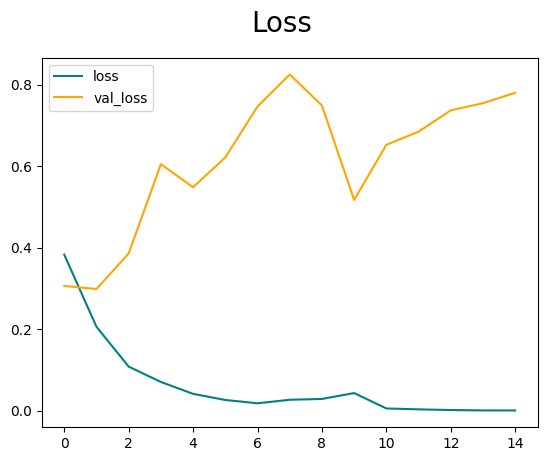

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

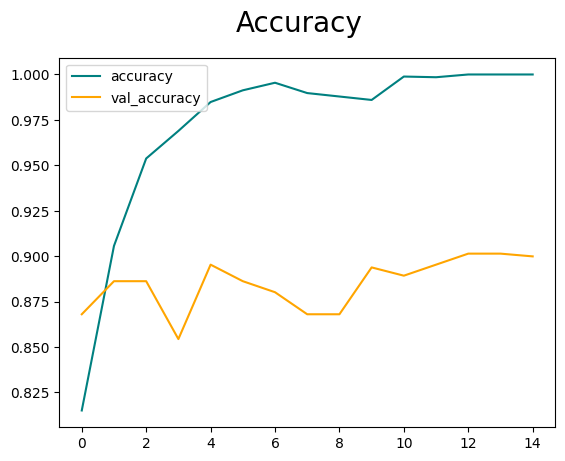

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
# plt.plot(hist.history['loss'], color='green', label='loss')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
pd.DataFrame(hist.history)

,loss,accuracy,val_loss,val_accuracy
0,0.382580,0.815011,0.305840,0.867982
1,0.205648,0.905610,0.298304,0.886191
2,0.107857,0.953753,0.385554,0.886191
3,0.070190,0.968916,0.604606,0.854325
4,0.041034,0.984837,0.548146,0.895296
5,0.025992,0.991281,0.621356,0.886191
6,0.017864,0.995451,0.746182,0.880121
7,0.026501,0.989765,0.824874,0.867982
8,0.028530,0.987870,0.748797,0.867982
9,0.042968,0.985974,0.516881,0.893778


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy, AUC , TrueNegatives , TruePositives, FalseNegatives, FalsePositives
l1 = {'tn' : TrueNegatives() ,'tp': TruePositives(),'fn': FalseNegatives(),'fp': FalsePositives(),'presion': Precision(),'recall': Recall(),'accuracy':CategoricalAccuracy(),'auc' :AUC()}

In [ ]:
val_ds = sol.val_ds

In [ ]:
xx , yy , yypred = [], [], []
for batch in val_ds.as_numpy_iterator():
    X, y = batch
    xx.extend(X)
    yy.extend(y)
    yhat = model.predict(X)
    yypred.extend(yhat)
    for key in l1.keys():
      l1[key].update_state(y, yhat)
yy = np.argmax(yy, axis=1)
yypred = np.argmax(yypred, axis=1)



1/1 [==============================] - 0s 250ms/step


Text(0.0, 1.0, 'efficent&resnet')

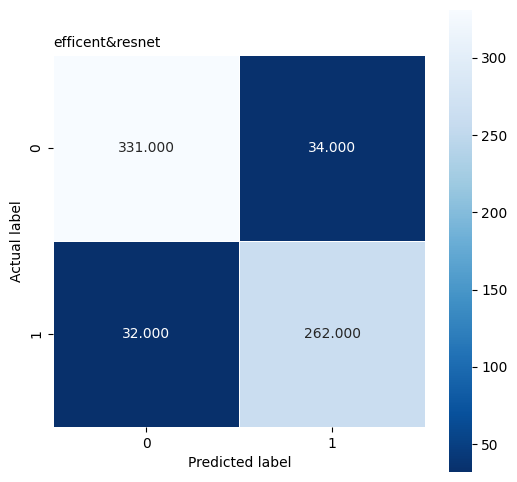

In [ ]:
import seaborn as sns
import matplotlib.pyplot  as plt
cm = confusion_matrix(yypred,yy)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = mo
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(yypred,yy)*100)
# plt.title(size=10,loc='right')
plt.title(title,size=10,loc='left')

In [ ]:
confusion_matrix(yypred,yy)

array([[331,  34],
       [ 32, 262]])

In [ ]:
print(classification_report(yypred,yy))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       365
           1       0.89      0.89      0.89       294

    accuracy                           0.90       659
   macro avg       0.90      0.90      0.90       659
weighted avg       0.90      0.90      0.90       659



In [ ]:
for x,v in l1.items():
  print(x,v.result())

tn tf.Tensor(593.0, shape=(), dtype=float32)
tp tf.Tensor(593.0, shape=(), dtype=float32)
fn tf.Tensor(66.0, shape=(), dtype=float32)
fp tf.Tensor(66.0, shape=(), dtype=float32)
presion tf.Tensor(0.8998483, shape=(), dtype=float32)
recall tf.Tensor(0.8998483, shape=(), dtype=float32)
accuracy tf.Tensor(0.8998483, shape=(), dtype=float32)
auc tf.Tensor(0.93519175, shape=(), dtype=float32)
